# Loan Prediction


### Importing Packages

In [1]:
import numpy as np # for working with arrays.
import pandas as pd # for working with data frames (tables).
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from dmba import plotDecisionTree, classificationSummary, regressionSummary
from dmba import adjusted_r2_score, AIC_score, BIC_score
import seaborn as sns

import numpy as np
import graphviz
import pydotplus

import matplotlib.pyplot as plt

from pathlib import Path # to interact with file system.
from sklearn.metrics import accuracy_score
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from dmba import classificationSummary, gainsChart, liftChart
from dmba.metric import AIC_score
import dmba
from dmba import plotDecisionTree, classificationSummary, regressionSummary

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

## Importing File

In [2]:
loan_df = pd.read_csv('datasets/train_loan_prediction.csv')

In [3]:
# Looking at the data first few records
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
# information on the data we have
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


+ Here we have float datatype and object data.
+ After getting to know the values look for creating dummies

In [5]:
#looking for the null values in the dataset
loan_df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
loan_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
loan_df['Gender'] = [0 if gender=="Female" else 1 for gender in loan_df['Gender']]
loan_df['Married'] = [0 if married=="No" else 1 for married in loan_df['Married']]
loan_df['Self_Employed'] = [0 if employ=="No" else 1 for employ in loan_df['Self_Employed']]
loan_df['Education'] = [0 if edu=="Graduate" else 1 for edu in loan_df['Education']]
loan_df['Loan_Status'] = [0 if status=="N" else 1 for status in loan_df['Loan_Status']]
loan_df['Dependents'] = loan_df.Dependents.map({'0':0,'1':1,'2':2,'3+':3})

In [8]:
#no null values after filling it
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0.0,0,0,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,1,1,1.0,0,0,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,1,1,0.0,0,1,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,1,1,0.0,1,0,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,1,0,0.0,0,0,6000,0.0,141.0,360.0,1.0,Urban,1


In [9]:
loan_df.Property_Area.value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [10]:
loan_df.Credit_History.fillna(value=1.0,inplace=True)
loan_df.Married.fillna(np.random.randint(0,2),inplace=True)

In [11]:
loan_df.Dependents.fillna(loan_df.Dependents.median(),inplace=True)
loan_df.LoanAmount.fillna(loan_df.LoanAmount.median(),inplace=True)
loan_df.Loan_Amount_Term.fillna(loan_df.Loan_Amount_Term.mean(),inplace=True)

In [12]:
loan_df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [13]:
loan_df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

# Data Visualization

In [14]:
num_predictors = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term']
np.round(loan_df[num_predictors].describe(),decimals=2)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
count,614.00,614.00,614.00,614.00
mean,5403.46,1621.25,145.75,342.00
std,6109.04,2926.25,84.11,64.37
min,150.00,0.00,9.00,12.00
25%,2877.50,0.00,100.25,360.00
50%,3812.50,1188.50,128.00,360.00
75%,5795.00,2297.25,164.75,360.00
max,81000.00,41667.00,700.00,480.00


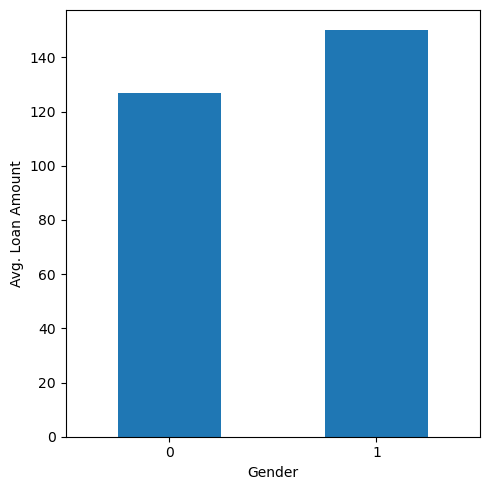

In [15]:
ax = loan_df.groupby('Gender').mean().LoanAmount.plot(kind='bar', figsize=[5, 5])
ax.set_ylabel('Avg. Loan Amount')
ax.set_xticklabels(ax.get_xticks(), rotation = 0)
plt.tight_layout()
plt.show()

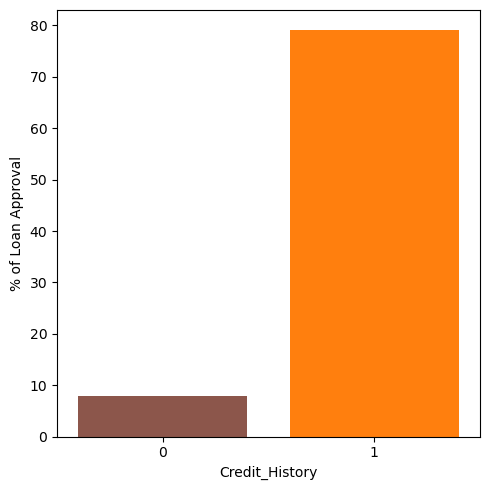

Credit_History
0.0     7.865169
1.0    79.047619
Name: Loan_Status, dtype: float64

In [16]:
dataforplot = loan_df.groupby(['Credit_History']).mean()['Loan_Status']*100
ax = dataforplot.plot(kind='bar', figsize=[5, 5])
ax.bar(dataforplot.index, dataforplot, color=['C5', 'C1'])
ax.set_ylabel('% of Loan Approval')
ax.set_xticklabels(ax.get_xticks(), rotation = 0)
plt.tight_layout()
plt.show()
dataforplot

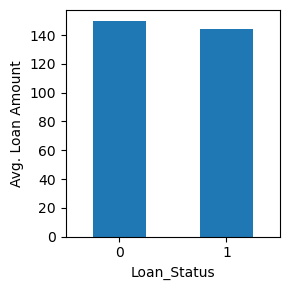

In [17]:
ax = loan_df.groupby('Loan_Status').mean().LoanAmount.plot(kind='bar', figsize=[3, 3])
ax.set_ylabel('Avg. Loan Amount')
ax.set_xticklabels(ax.get_xticks(), rotation = 0)
plt.tight_layout()
plt.show()

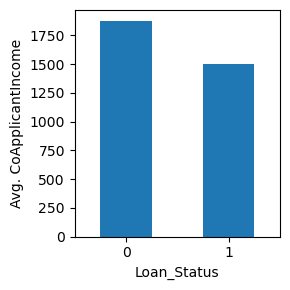

In [18]:
ax = loan_df.groupby('Loan_Status').mean().CoapplicantIncome.plot(kind='bar', figsize=[3, 3])
ax.set_ylabel('Avg. CoApplicantIncome')
ax.set_xticklabels(ax.get_xticks(), rotation = 0)
plt.tight_layout()
plt.show()

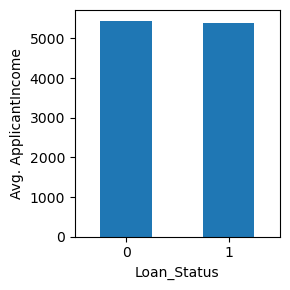

In [19]:
ax = loan_df.groupby('Loan_Status').mean().ApplicantIncome.plot(kind='bar', figsize=[3, 3])
ax.set_ylabel('Avg. ApplicantIncome')
ax.set_xticklabels(ax.get_xticks(), rotation = 0)
plt.tight_layout()
plt.show()

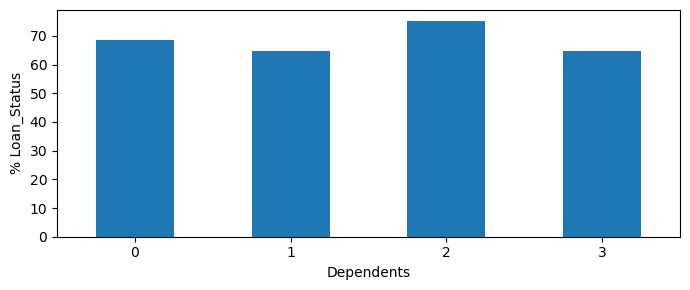

Dependents
0.0    68.611111
1.0    64.705882
2.0    75.247525
3.0    64.705882
Name: Loan_Status, dtype: float64

In [20]:
dataplot=loan_df.groupby('Dependents').mean()['Loan_Status']*100
ax = dataplot.plot(kind='bar', figsize=[7,3])
ax.set_ylabel('% Loan_Status')
ax.set_xticklabels(ax.get_xticks(), rotation = 0)
plt.tight_layout()
plt.show()
dataplot

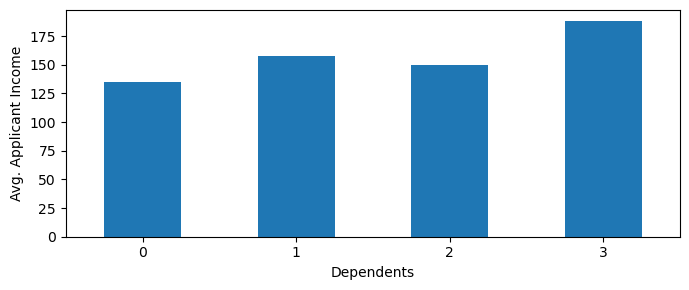

In [21]:
ax = loan_df.groupby('Dependents').mean().LoanAmount.plot(kind='bar', figsize=[7,3])
ax.set_ylabel('Avg. Applicant Income')
ax.set_xticklabels(ax.get_xticks(), rotation = 0)
plt.tight_layout()
plt.show()

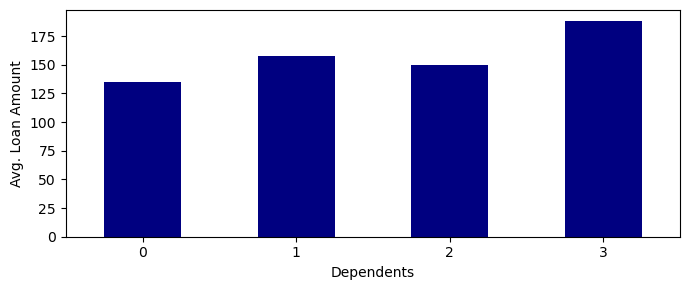

In [22]:
ax = loan_df.groupby('Dependents').mean().LoanAmount.plot(kind='bar', figsize=[7,3],color='navy')
ax.set_ylabel('Avg. Loan Amount')
ax.set_xticklabels(ax.get_xticks(), rotation = 0)
plt.tight_layout()
plt.show()

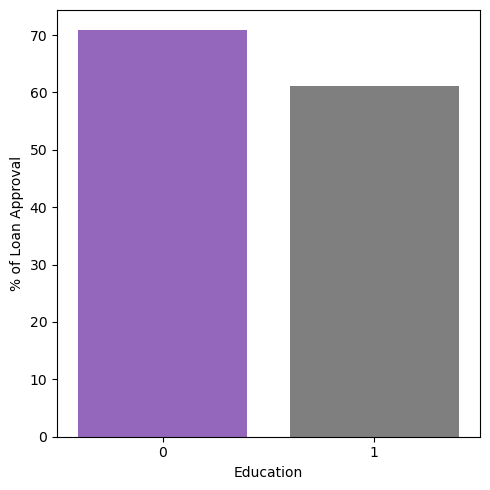

Education
0    70.833333
1    61.194030
Name: Loan_Status, dtype: float64

In [23]:
dataforplot = loan_df.groupby(['Education']).mean()['Loan_Status']*100
ax = dataforplot.plot(kind='bar', figsize=[5, 5])
ax.bar(dataforplot.index, dataforplot, color=['C4', 'C7'])
ax.set_ylabel('% of Loan Approval')
ax.set_xticklabels(ax.get_xticks(), rotation = 0)
plt.tight_layout()
plt.show()
dataforplot

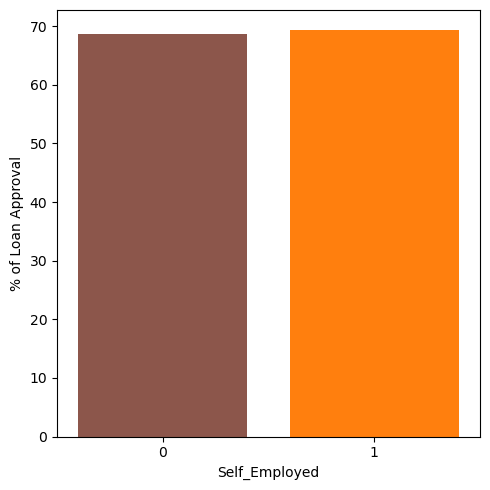

Self_Employed
0    68.600000
1    69.298246
Name: Loan_Status, dtype: float64

In [24]:
dataforplot = loan_df.groupby(['Self_Employed']).mean()['Loan_Status']*100
ax = dataforplot.plot(kind='bar', figsize=[5, 5])
ax.bar(dataforplot.index, dataforplot, color=['C5', 'C1'])
ax.set_ylabel('% of Loan Approval')
ax.set_xticklabels(ax.get_xticks(), rotation = 0)
plt.tight_layout()
plt.show()
dataforplot

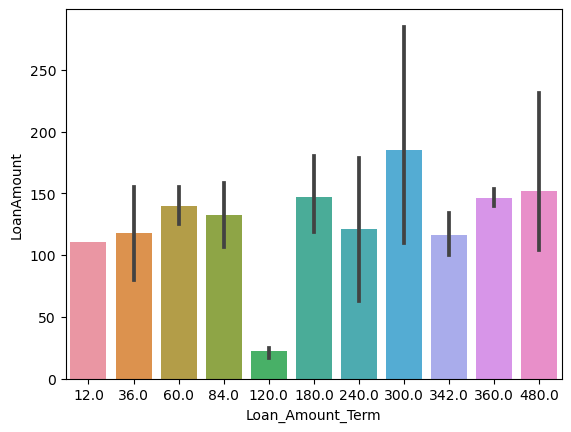

In [25]:
sns.barplot(x = 'Loan_Amount_Term',y='LoanAmount',data=loan_df)
plt.show()

In [26]:
loan_df.groupby('Loan_Status').mean()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Loan_Status,,,,,,,,,,
0,0.807292,0.588542,0.729167,0.270833,0.182292,5446.078125,1877.807292,149.890625,344.000000,0.572917
1,0.822275,0.682464,0.751185,0.194313,0.187204,5384.068720,1504.516398,143.869668,341.090047,0.983412


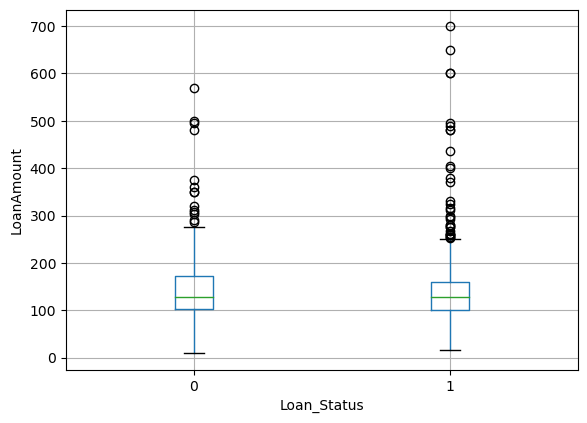

In [27]:
ax = loan_df.boxplot(column='LoanAmount', by='Loan_Status')
ax.set_ylabel('LoanAmount')
plt.suptitle('')  # Suppress the titles
plt.title('')

plt.show()

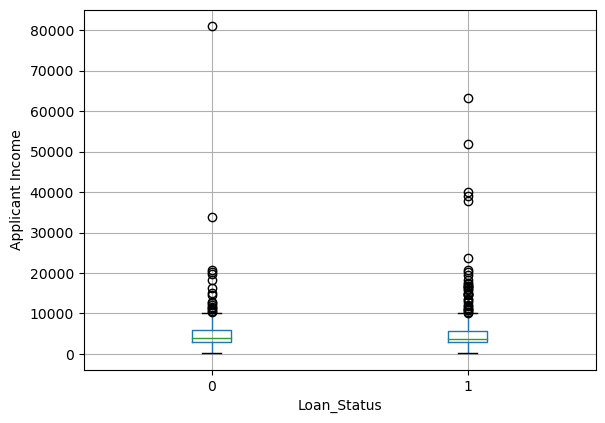

In [28]:
ax = loan_df.boxplot(column='ApplicantIncome', by='Loan_Status')
ax.set_ylabel('Applicant Income')
plt.suptitle('')  # Suppress the titles
plt.title('')

plt.show()

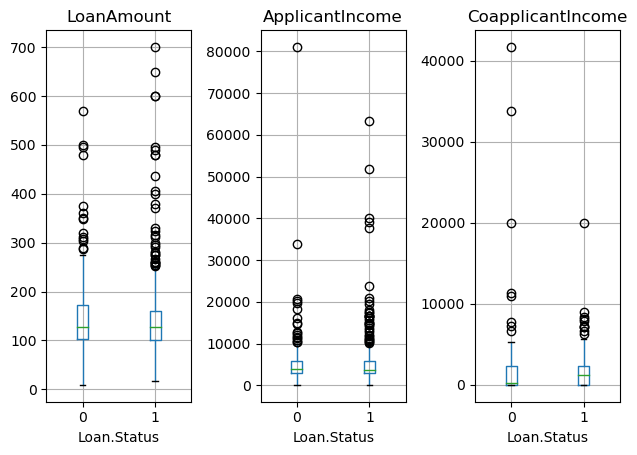

In [29]:
fig, axes = plt.subplots(nrows=1, ncols=3)
loan_df.boxplot(column='LoanAmount', by='Loan_Status', ax=axes[0])
loan_df.boxplot(column='ApplicantIncome', by='Loan_Status', ax=axes[1])
loan_df.boxplot(column='CoapplicantIncome', by='Loan_Status', ax=axes[2])
for ax in axes:
    ax.set_xlabel('Loan.Status')
plt.suptitle('')  # Suppress the overall title
plt.tight_layout()  # Increase the separation between the plots

plt.show()

<AxesSubplot:>

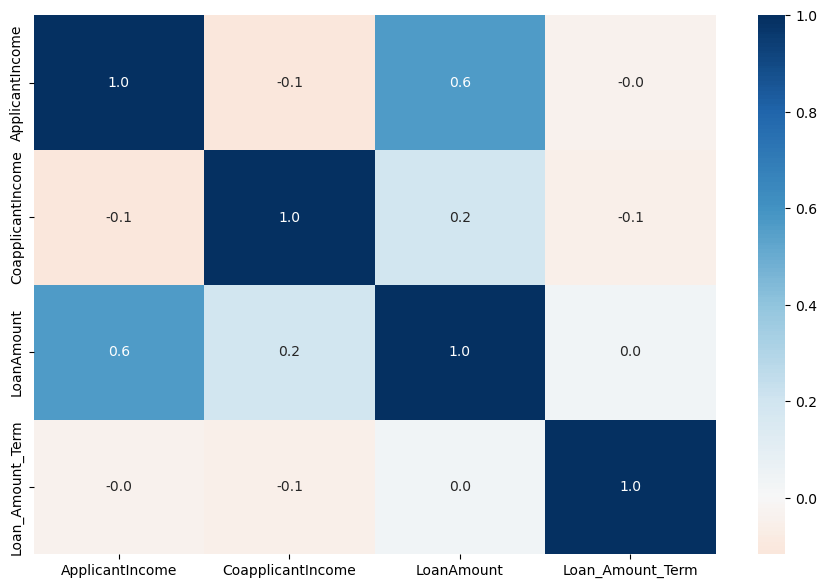

In [30]:
corr = loan_df[num_predictors].corr()
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
sns.heatmap(corr, annot=True, fmt=".1f", cmap="RdBu", center=0, ax=ax)

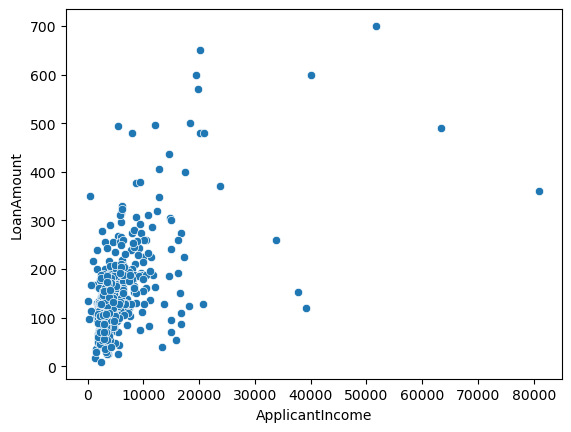

In [31]:
sns.scatterplot(x = 'ApplicantIncome', y = 'LoanAmount', data=loan_df)
plt.show()

# MODEL BUILDING

## KNN classification

In [32]:
loan_df_knn=loan_df.drop(columns=['Loan_ID'])
loan_df_knn.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0.0,0,0,5849,0.0,128.0,360.0,1.0,Urban,1
1,1,1,1.0,0,0,4583,1508.0,128.0,360.0,1.0,Rural,0
2,1,1,0.0,0,1,3000,0.0,66.0,360.0,1.0,Urban,1
3,1,1,0.0,1,0,2583,2358.0,120.0,360.0,1.0,Urban,1
4,1,0,0.0,0,0,6000,0.0,141.0,360.0,1.0,Urban,1


In [33]:
loan_df_knn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    float64
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 57.7+ KB


In [34]:
loan_df_knn['Property_Area'] = loan_df_knn['Property_Area'].astype('category')

In [35]:
# creating dummies for the above dataset
loan_df_knn = pd.get_dummies(loan_df_knn,prefix_sep = '_',drop_first=True)

In [36]:
numerical_predictors = loan_df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']]
numerical_predictors.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
count,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.000000
std,6109.041673,2926.248369,84.107233,64.372489
min,150.000000,0.000000,9.000000,12.000000
25%,2877.500000,0.000000,100.250000,360.000000
50%,3812.500000,1188.500000,128.000000,360.000000
75%,5795.000000,2297.250000,164.750000,360.000000
max,81000.000000,41667.000000,700.000000,480.000000


In [37]:
# partioning the data into training data and validation data
trainData,validData = train_test_split(loan_df_knn,test_size=0.2,random_state=1)
print(trainData.shape)
print(validData.shape)

(491, 13)
(123, 13)


In [38]:
loan_df_knn.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0.0,0,0,5849,0.0,128.0,360.0,1.0,1,0,1
1,1,1,1.0,0,0,4583,1508.0,128.0,360.0,1.0,0,0,0
2,1,1,0.0,0,1,3000,0.0,66.0,360.0,1.0,1,0,1
3,1,1,0.0,1,0,2583,2358.0,120.0,360.0,1.0,1,0,1
4,1,0,0.0,0,0,6000,0.0,141.0,360.0,1.0,1,0,1


In [39]:
loan_df_knn.dtypes

Gender                       int64
Married                      int64
Dependents                 float64
Education                    int64
Self_Employed                int64
ApplicantIncome              int64
CoapplicantIncome          float64
LoanAmount                 float64
Loan_Amount_Term           float64
Credit_History             float64
Loan_Status                  int64
Property_Area_Semiurban      uint8
Property_Area_Urban          uint8
dtype: object

In [40]:
# introducing new data

new_entry = pd.DataFrame([{'ApplicantIncome':5720,'CoapplicantIncome':0.0,'LoanAmount':1100.0,'Loan_Amount_Term':360.0,
                           'Credit_History':1}])
new_entry.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [41]:
# Normalizing Training Data and Validation Data

scaler = preprocessing.StandardScaler()
scaler.fit(trainData[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History']])  # Note the use of an array of column names

# Transform the full dataset
loanNorm = pd.concat([pd.DataFrame(scaler.transform(loan_df_knn[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History']]), 
                                    columns=['zApplicantIncome', 'zCoapplicantIncome', 'zLoanAmount',
       'zLoan_Amount_Term', 'zCredit_History']),
                       loan_df_knn[['Loan_Status']]], axis=1)
trainNorm = loanNorm.iloc[trainData.index]
#Similarly, get the valid one as well
validNorm = loanNorm.iloc[validData.index]
#Scale the new data
newEntryNorm = pd.DataFrame(scaler.transform(new_entry[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History']]),
                               columns=['zApplicantIncome', 'zCoapplicantIncome', 'zLoanAmount',
       'zLoan_Amount_Term', 'zCredit_History'])

In [42]:
trainNorm.head()

,zApplicantIncome,zCoapplicantIncome,zLoanAmount,zLoan_Amount_Term,zCredit_History,Loan_Status
291,-0.175046,-0.521156,-0.232735,0.296929,-2.412352,0
507,-0.301461,-0.521156,-0.580854,0.296929,0.414533,0
328,-0.185413,0.285209,-0.423639,0.296929,0.414533,0
609,-0.407143,-0.521156,-0.861595,0.296929,0.414533,1
69,-0.190519,-0.521156,-0.131668,0.296929,-2.412352,0


In [43]:
validNorm.head()

,zApplicantIncome,zCoapplicantIncome,zLoanAmount,zLoan_Amount_Term,zCredit_History,Loan_Status
533,0.884861,-0.521156,0.542111,0.296929,0.414533,0
544,-0.389039,-0.303033,-0.513476,0.296929,0.414533,1
41,-0.577347,-0.122086,-1.131107,0.296929,0.414533,1
148,0.691448,0.026948,0.867771,0.296929,0.414533,0
111,-0.402655,0.246387,-0.097979,0.296929,0.414533,1


In [44]:
loanNorm.head()

,zApplicantIncome,zCoapplicantIncome,zLoanAmount,zLoan_Amount_Term,zCredit_History,Loan_Status
0,0.049159,-0.521156,-0.221505,0.296929,0.414533,1
1,-0.146730,-0.025033,-0.221505,0.296929,0.414533,0
2,-0.391670,-0.521156,-0.917744,0.296929,0.414533,1
3,-0.456192,0.254612,-0.311343,0.296929,0.414533,1
4,0.072523,-0.521156,-0.075520,0.296929,0.414533,1


In [45]:
# Applying KNN Model with applying K=3 for the training Data Set
knn = KNeighborsClassifier(n_neighbors=3).fit(trainNorm[['zApplicantIncome', 'zCoapplicantIncome', 'zLoanAmount',
       'zLoan_Amount_Term', 'zCredit_History']], trainNorm['Loan_Status'])
distances, indices = knn.kneighbors(newEntryNorm)
print('newEntryNorm[Loan_Status]',knn.predict(newEntryNorm))
print('Distances',distances)
print('Indices', indices)
print(trainNorm.iloc[indices[0], :])

newEntryNorm[Loan_Status] [1]
Distances [[5.8183962  6.00516064 6.56686204]]
Indices [[391 451 417]]
     zApplicantIncome  zCoapplicantIncome  zLoanAmount  zLoan_Amount_Term  \
130          2.264443           -0.521156     5.640372           2.119331   
561          2.158916           -0.521156     5.078889           0.296929   
369          2.196980            1.211327     4.742000           0.296929   

     zCredit_History  Loan_Status  
130         0.414533            1  
561         0.414533            1  
369         0.414533            0  


In [46]:
accuracy_score(trainNorm['Loan_Status'],knn.predict(trainNorm[['zApplicantIncome', 'zCoapplicantIncome', 'zLoanAmount',
       'zLoan_Amount_Term', 'zCredit_History']]))

0.8533604887983707

In [47]:
classificationSummary(trainNorm['Loan_Status'],knn.predict(trainNorm[['zApplicantIncome', 'zCoapplicantIncome', 'zLoanAmount',
       'zLoan_Amount_Term', 'zCredit_History']]))

Confusion Matrix (Accuracy 0.8534)

       Prediction
Actual   0   1
     0 101  52
     1  20 318


In [48]:
accuracy_score(validNorm['Loan_Status'],knn.predict(validNorm[['zApplicantIncome', 'zCoapplicantIncome', 'zLoanAmount',
       'zLoan_Amount_Term', 'zCredit_History']]))

0.7886178861788617

In [49]:
#classfication summary
classificationSummary(validNorm['Loan_Status'],knn.predict(validNorm[['zApplicantIncome', 'zCoapplicantIncome', 'zLoanAmount',
       'zLoan_Amount_Term', 'zCredit_History']]))

Confusion Matrix (Accuracy 0.7886)

       Prediction
Actual  0  1
     0 21 18
     1  8 76


In [50]:
# applying KNN on the validation data
knn = KNeighborsClassifier(n_neighbors=3).fit(validNorm[['zApplicantIncome', 'zCoapplicantIncome', 'zLoanAmount',
       'zLoan_Amount_Term', 'zCredit_History']], validNorm['Loan_Status'])
distances, indices = knn.kneighbors(newEntryNorm)
print('newEntryNorm[Personal Loan]',knn.predict(newEntryNorm))
print('Distances',distances)
print('Indices', indices)
print(validNorm.iloc[indices[0], :])

newEntryNorm[Personal Loan] [0]
Distances [[8.75932985 8.87676712 9.23894039]]
Indices [[ 99  59 113]]
     zApplicantIncome  zCoapplicantIncome  zLoanAmount  zLoan_Amount_Term  \
260          0.085366            0.877069     2.046884           0.296929   
34           1.078275            0.465826     1.934587           0.296929   
9            1.131038            3.087252     2.260247           0.296929   

     zCredit_History  Loan_Status  
260         0.414533            1  
34          0.414533            0  
9           0.414533            0  


In [51]:
## finding besk K by taking the accuracy scores using validation data
train_X =trainNorm[['zApplicantIncome', 'zCoapplicantIncome', 'zLoanAmount',
       'zLoan_Amount_Term', 'zCredit_History']]
train_y = trainNorm['Loan_Status']
valid_X = validNorm[['zApplicantIncome', 'zCoapplicantIncome', 'zLoanAmount',
       'zLoan_Amount_Term', 'zCredit_History']]
valid_y = validNorm['Loan_Status']

# Train a classifier for different values of k
results = []
for k in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=k).fit(train_X, train_y)
    results.append({
        'k': k,
        'accuracy': accuracy_score(valid_y, knn.predict(valid_X))
    })

# Convert results to a pandas data frame
results = pd.DataFrame(results)
print(results)

     k  accuracy
0    1  0.756098
1    2  0.666667
2    3  0.788618
3    4  0.747967
4    5  0.796748
5    6  0.780488
6    7  0.788618
7    8  0.796748
8    9  0.788618
9   10  0.796748
10  11  0.796748
11  12  0.796748
12  13  0.796748
13  14  0.796748
14  15  0.804878
15  16  0.804878
16  17  0.804878
17  18  0.804878
18  19  0.804878
19  20  0.804878
20  21  0.804878
21  22  0.804878
22  23  0.804878
23  24  0.804878
24  25  0.804878
25  26  0.804878
26  27  0.804878
27  28  0.804878
28  29  0.804878


In [52]:
#With the best K =15
# Applying KNN Model with applying K=3 for the training Data Set
knn = KNeighborsClassifier(n_neighbors=15).fit(trainNorm[['zApplicantIncome', 'zCoapplicantIncome', 'zLoanAmount',
       'zLoan_Amount_Term', 'zCredit_History']], trainNorm['Loan_Status'])
distances, indices = knn.kneighbors(newEntryNorm)
print('newEntryNorm[Loan_Status]',knn.predict(newEntryNorm))
print('Distances',distances)
print('Indices', indices)
print(trainNorm.iloc[indices[0], :])

newEntryNorm[Loan_Status] [1]
Distances [[5.8183962  6.00516064 6.56686204 6.85195984 7.01474444 7.31556849
  7.35878829 7.58154919 7.66512501 7.88275936 8.06931306 8.24443287
  8.47127249 8.55703927 8.66199622]]
Indices [[391 451 417 229 380  28 164 370  92 371 166 329 186 319 434]]
     zApplicantIncome  zCoapplicantIncome  zLoanAmount  zLoan_Amount_Term  \
130          2.264443           -0.521156     5.640372           2.119331   
561          2.158916           -0.521156     5.078889           0.296929   
369          2.196980            1.211327     4.742000           0.296929   
604          1.000910           -0.521156     3.911006           0.296929   
487          1.980821           -0.521156     3.955924           0.296929   
308          2.274810           -0.521156     3.731331           0.296929   
523          0.373939            1.836416     3.731331           0.296929   
278          1.400580           -0.521156     3.237227           0.296929   
506          2.367649 

In [53]:
accuracy_score(trainNorm['Loan_Status'],knn.predict(trainNorm[['zApplicantIncome', 'zCoapplicantIncome', 'zLoanAmount',
       'zLoan_Amount_Term', 'zCredit_History']]))

0.8126272912423625

In [54]:
classificationSummary(trainNorm['Loan_Status'],knn.predict(trainNorm[['zApplicantIncome', 'zCoapplicantIncome', 'zLoanAmount',
       'zLoan_Amount_Term', 'zCredit_History']]))

Confusion Matrix (Accuracy 0.8126)

       Prediction
Actual   0   1
     0  66  87
     1   5 333


In [55]:
accuracy_score(validNorm['Loan_Status'],knn.predict(validNorm[['zApplicantIncome', 'zCoapplicantIncome', 'zLoanAmount',
       'zLoan_Amount_Term', 'zCredit_History']]))

0.8048780487804879

In [56]:
classificationSummary(validNorm['Loan_Status'],knn.predict(validNorm[['zApplicantIncome', 'zCoapplicantIncome', 'zLoanAmount',
       'zLoan_Amount_Term', 'zCredit_History']]))

Confusion Matrix (Accuracy 0.8049)

       Prediction
Actual  0  1
     0 16 23
     1  1 83


## Decision Tree Model

In [57]:
loan_df_dt = loan_df_knn[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Dependents', 'Education',
       'Self_Employed','Loan_Status']]
X = loan_df_knn[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History']]
y = loan_df_knn['Loan_Status']
train_X,valid_X,train_y,valid_y = train_test_split(X,y,test_size = 0.2,random_state=3)

In [58]:
classTree = DecisionTreeClassifier(random_state=0, max_depth=1)
classTree.fit(trainData.drop(columns=['Loan_Status']), trainData['Loan_Status'])

classTree.classes_

array([0, 1], dtype=int64)

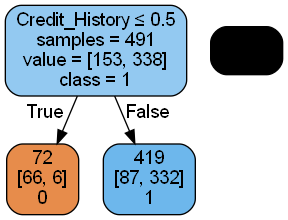

In [59]:
plotDecisionTree(classTree, feature_names=trainData.columns[:12], class_names=classTree.classes_)

In [60]:
smallClassTree = DecisionTreeClassifier(max_depth=8, 
        min_impurity_decrease=0.005, min_samples_split=50)
smallClassTree.fit(train_X, train_y)

DecisionTreeClassifier(max_depth=8, min_impurity_decrease=0.005,
                       min_samples_split=50)

Small Classification Tree with Control Parameters


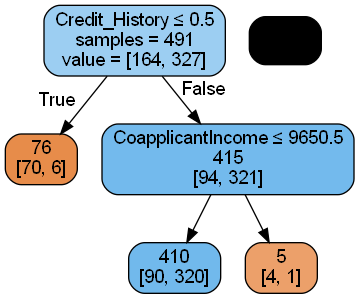

In [61]:
print('Small Classification Tree with Control Parameters')
plotDecisionTree(smallClassTree, feature_names=train_X.columns)

In [62]:
classificationSummary(train_y, smallClassTree.predict(train_X))

Confusion Matrix (Accuracy 0.8024)

       Prediction
Actual   0   1
     0  74  90
     1   7 320


In [63]:
classificationSummary(valid_y, smallClassTree.predict(valid_X))

Confusion Matrix (Accuracy 0.8618)

       Prediction
Actual  0  1
     0 12 16
     1  1 94


In [69]:
# Start with an initial guess for parameters
param_grid = {
    'max_depth': [10, 20, 30, 40], 
    'min_samples_split': [20, 40, 60, 80, 100], 
    'min_impurity_decrease': [0, 0.0005, 0.001, 0.005, 0.01], 
}
gridSearch = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, n_jobs=-1) #n_jobs=-1 means 
        #that the availalbe computer memory (CPU) will be used to make calculations faster. 
gridSearch.fit(train_X, train_y)
print('Initial score: ', gridSearch.best_score_)
print('Initial parameters: ', gridSearch.best_params_)

# Adapt grid based on result from initial grid search
param_grid = {
    'max_depth': list(range(2, 16)), 
    'min_samples_split': list(range(10, 22)), 
    'min_impurity_decrease': [0.0009, 0.001, 0.0011], 
}
gridSearch = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)
print('Improved score: ', gridSearch.best_score_)
print('Improved parameters: ', gridSearch.best_params_)

bestClassTree = gridSearch.best_estimator_

Initial score:  0.7942692228406514
Initial parameters:  {'max_depth': 10, 'min_impurity_decrease': 0.005, 'min_samples_split': 20}
Improved score:  0.7922490208204495
Improved parameters:  {'max_depth': 2, 'min_impurity_decrease': 0.0009, 'min_samples_split': 10}


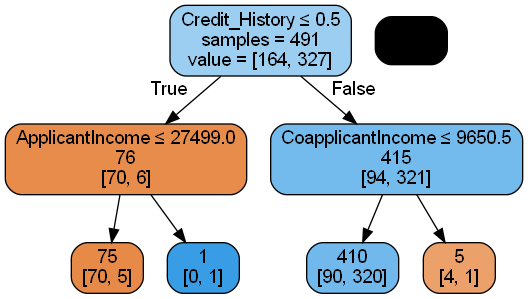

In [70]:
plotDecisionTree(bestClassTree, feature_names=train_X.columns)

In [71]:
classificationSummary(train_y, bestClassTree.predict(train_X))
classificationSummary(valid_y, bestClassTree.predict(valid_X))

Confusion Matrix (Accuracy 0.8045)

       Prediction
Actual   0   1
     0  74  90
     1   6 321
Confusion Matrix (Accuracy 0.8537)

       Prediction
Actual  0  1
     0 11 17
     1  1 94


# Random Forest Classifier

In [72]:
rf = RandomForestClassifier(n_estimators=300, random_state=5)
rf.fit(train_X, train_y)

RandomForestClassifier(n_estimators=300, random_state=5)

             feature  importance       std
3   Loan_Amount_Term    0.052561  0.018286
1  CoapplicantIncome    0.151512  0.033683
2         LoanAmount    0.230008  0.040419
4     Credit_History    0.277926  0.040219
0    ApplicantIncome    0.287993  0.043176


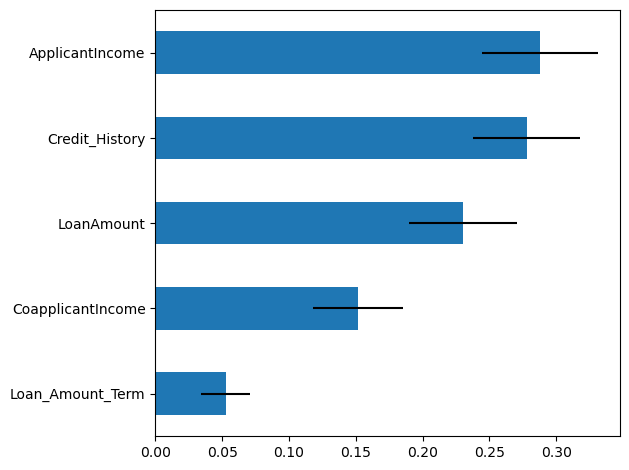

In [73]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

df = pd.DataFrame({'feature': train_X.columns, 'importance': importances, 'std': std})
df = df.sort_values('importance')
print(df)

ax = df.plot(kind='barh', xerr='std', x='feature', legend=False)
ax.set_ylabel('')

plt.tight_layout()
plt.show()

In [74]:
classificationSummary(valid_y, rf.predict(valid_X))

Confusion Matrix (Accuracy 0.8455)

       Prediction
Actual  0  1
     0 17 11
     1  8 87


# Logistic Regression

In [75]:
# Logistic Regression
loan_df_lr = loan_df_knn

In [76]:
loan_df_lr.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status',
       'Property_Area_Semiurban', 'Property_Area_Urban'],
      dtype='object')

In [77]:
X = loan_df_lr[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Credit_History']]
y = loan_df_lr['Loan_Status']


# partioning the data
train_X,valid_X,train_y,valid_y = train_test_split(X,y,test_size = 0.2,random_state=3)

In [78]:
logit_reg = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
logit_reg.fit(train_X, train_y)

#Get intercepts, coefficients, and AIC
print('intercept ', logit_reg.intercept_[0])
print(pd.DataFrame({'coeff': logit_reg.coef_[0]}, index=X.columns).transpose())
print() #Creates a Line space
print('AIC', AIC_score(valid_y, logit_reg.predict(valid_X), df = len(train_X.columns) + 1))

intercept  -2.1479911417807767
       ApplicantIncome  CoapplicantIncome  LoanAmount  Credit_History
coeff         0.000016          -0.000049   -0.001016        3.521392

AIC 117.64544477645669


In [79]:
logit_reg_pred = logit_reg.predict(valid_X)
logit_reg_proba = logit_reg.predict_proba(valid_X)
logit_result = pd.DataFrame({'actual': valid_y, 
                             'p(0)': [p[0] for p in logit_reg_proba],
                             'p(1)': [p[1] for p in logit_reg_proba],
                             'predicted': logit_reg_pred })
logit_result.head()

,actual,p(0),p(1),predicted
455,1,0.207779,0.792221,1
132,1,0.206476,0.793524,1
244,1,0.252129,0.747871,1
53,0,0.212150,0.787850,1
264,1,0.209653,0.790347,1


In [80]:
classificationSummary(train_y,logit_reg.predict(train_X))

Confusion Matrix (Accuracy 0.8004)

       Prediction
Actual   0   1
     0  72  92
     1   6 321


In [81]:
classificationSummary(valid_y, logit_reg_pred)

Confusion Matrix (Accuracy 0.8618)

       Prediction
Actual  0  1
     0 12 16
     1  1 94
